In [95]:
pip install nltk pandas matplotlib scipy huggingface_hub pyarrow fsspec seaborn scikit-learn wordcloud -q

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import os
import nltk

# corpus de nltk para 'tokenizer' y 'stopwords'
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\felip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\felip\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\felip\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\felip\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

## preprocesamiento de textos

In [2]:
df = pd.read_parquet("hf://datasets/AndresR2909/youtube_transcriptions_summaries_gpt4o/data/train-00000-of-00001.parquet")

df.info()

c:\repos\eda_anteproyecto\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   chanel_name           3256 non-null   object 
 1   video_id              3256 non-null   object 
 2   source                3256 non-null   object 
 3   publish_date          3141 non-null   object 
 4   duration              3256 non-null   float64
 5   last_update_date      3256 non-null   object 
 6   title                 3256 non-null   object 
 7   text                  3256 non-null   object 
 8   year                  3256 non-null   int64  
 9   number_of_tokenks     3256 non-null   int64  
 10  number_of_new_tokens  942 non-null    float64
 11  prompt                3256 non-null   object 
 12  summary               3256 non-null   object 
 13  key_terms             3256 non-null   object 
 14  __index_level_0__     3256 non-null   int64  
dtypes: float64(2), int64(

In [3]:
print(df.iloc[-2]["text"])

qué hará bitcoin hoy 02.01.2024 08:00 análisis técnico btc-eth esteban perez trader. saludos cordiales y bienvenido como vemos en la imagen algo que no logró llegar a ocurrir en los últimos días en las últimas dos semanas del año 2023 que los futuros de bitcoin en el mercado cme obtuvieran sus objetivos de corto plazo y también de mediano plazo vemos que en estas horas en cuanto ha abierto la cotización en este año 2024 en los futuros ya lo ha logrado en este momento podemos ver que son las 8 de la mañana de madrid las 7 de horario gmt el horario universal y damos comienzo como cada jornada a partir de ahora cada día hasta el viernes con este primer análisis donde incluiremos niveles intr diarios [música] comenzamos y lo hacemos de la mano como siempre mirando antes que nada los fundamentales el calendario macroeconómico para la jornada de hoy que lo encuentras en la plataforma de xtv desde estados unidos el índice pmi para la industria del mes de diciembre más tarde en el canal de la 

In [4]:
print(df.iloc[-2]["summary"])

**Introducción**

El análisis técnico presentado por Esteban Pérez, trader, se centra en las perspectivas de Bitcoin y Ethereum al inicio del año 2024. El informe detalla los movimientos recientes en los mercados de futuros y contado, destacando niveles clave y posibles escenarios para ambos activos. Se hace hincapié en la importancia de los niveles intradiarios y se ofrece un análisis detallado de las tendencias actuales y futuras.

**Puntos más importantes**

- **Futuros de Bitcoin en CME**: Al inicio de 2024, los futuros de Bitcoin han alcanzado sus objetivos de corto y mediano plazo, algo que no se logró en las últimas semanas de 2023.
  
- **Niveles clave de Bitcoin**: 
  - Eje central de operaciones para la semana: 42,331.
  - Objetivos semanales: 43,385, 44,100, y 46,385.
  - Posible formación de un patrón de "hombro cabeza hombro" en la acción del precio.
  - Triple máximo roto en la zona de 44,444.
  
- **Análisis de Ethereum**:
  - Punto de partida: 2,282.10.
  - Objetivos se

In [5]:
print(df.iloc[-2]["key_terms"])

['Bitcoin (BTC)' 'Ethereum (ETH)']


In [6]:
# Tokenizing the text in each row
df['tokenized_text'] = df['summary'].apply(lambda text: nltk.word_tokenize(str(text), language='spanish', preserve_line=True))

# Counting the number of tokens in each row
df['count_text'] = df['tokenized_text'].apply(len)

In [8]:
df['duration_min'] = df['duration'] / 60

In [10]:
df['chanel_name'] = df['chanel_name'].astype('category')
df_agrupado = df.groupby('video_id').first().reset_index()
df_agrupado[['duration_min', 'number_of_tokenks']].describe()

,duration_min,number_of_tokenks
count,2652.000000,2652.000000
mean,25.648108,5124.727376
std,29.751558,5612.551033
min,0.566667,68.000000
25%,11.783333,2523.000000
50%,15.925000,3336.000000
75%,21.804167,4444.250000
max,190.383333,34922.000000


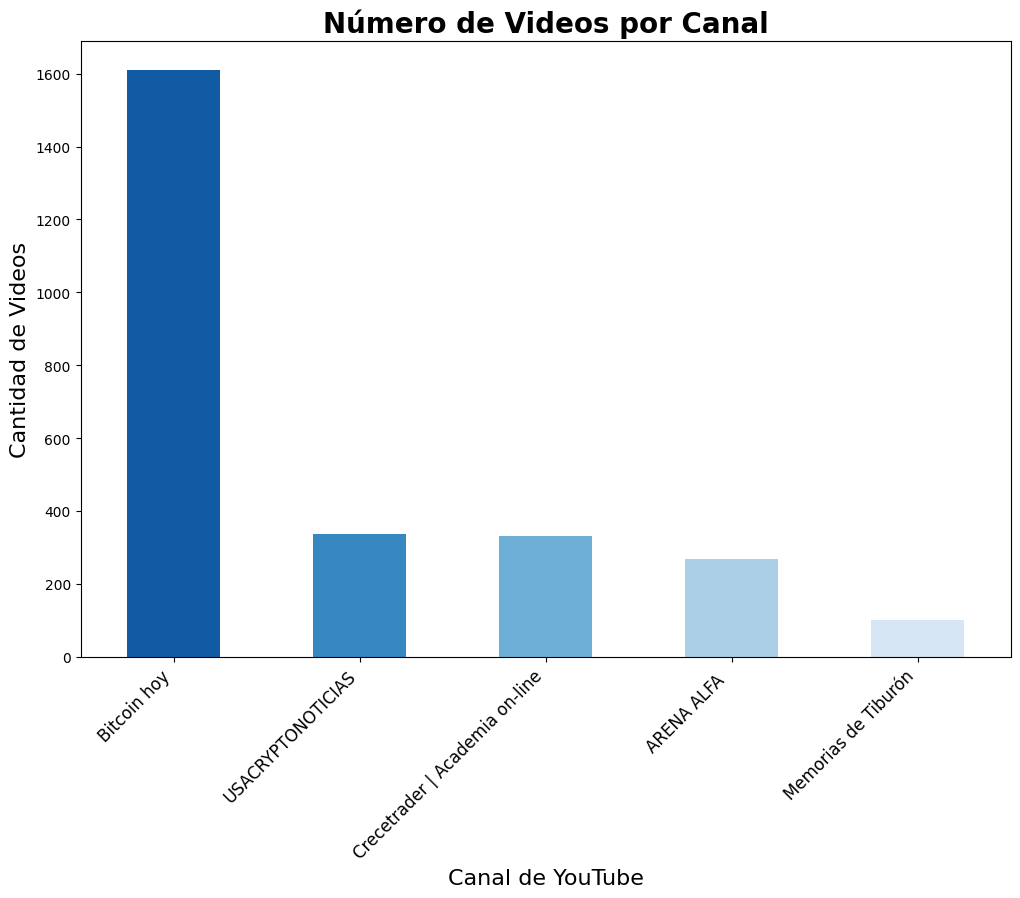

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el conteo de videos por canal
video_counts = df_agrupado['chanel_name'].value_counts()

# Crear el gráfico de barras con una paleta en tonos de rojo
plt.figure(figsize=(12, 8))
colors = sns.color_palette("Blues_r", len(video_counts))
video_counts.plot(kind='bar', color=colors)

# Títulos y etiquetas
plt.title('Número de Videos por Canal', fontsize=20, fontweight='bold')
plt.xlabel('Canal de YouTube', fontsize=16)
plt.ylabel('Cantidad de Videos', fontsize=16)

# Rotar las etiquetas del eje X para mejorar la legibilidad
plt.xticks(rotation=45, ha='right', fontsize=12)

# Mostrar gráfico
plt.show()

C:\Users\felip\AppData\Local\Temp\ipykernel_19260\4003295329.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df_agrupado.groupby('chanel_name')['number_of_tokenks'].mean()
C:\Users\felip\AppData\Local\Temp\ipykernel_19260\4003295329.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df_agrupado.groupby('chanel_name')['number_of_tokenks'].median()
C:\Users\felip\AppData\Local\Temp\ipykernel_19260\4003295329.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observe

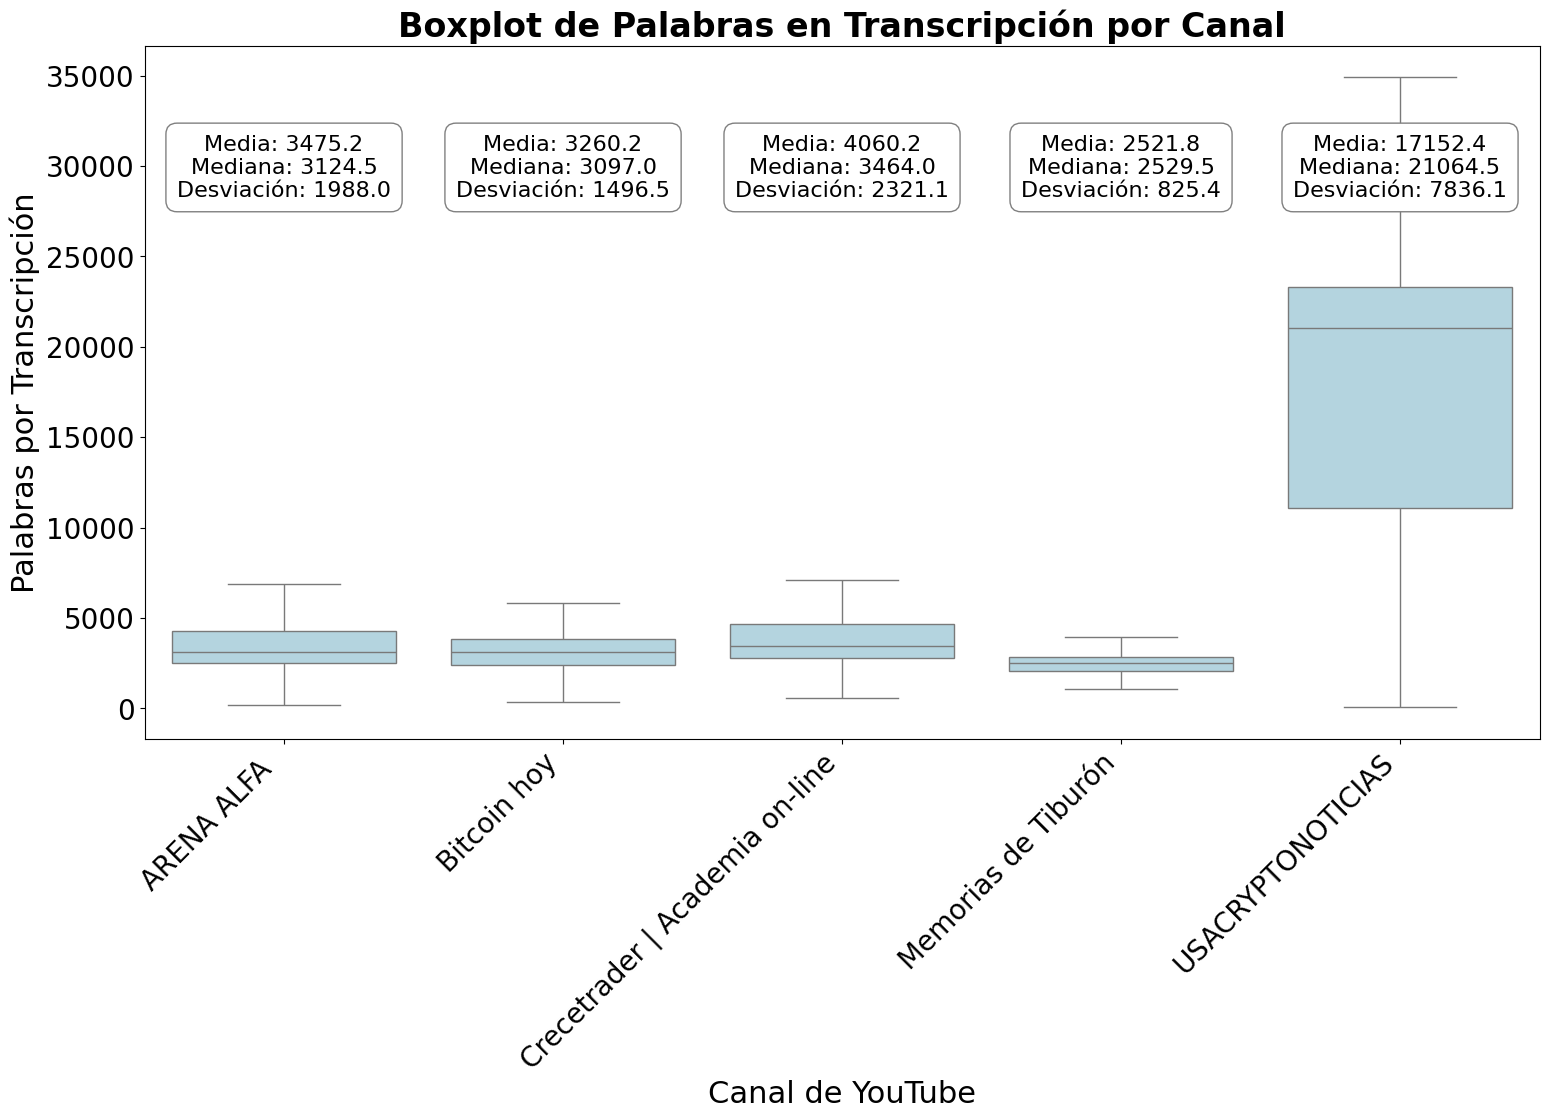

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el boxplot sin outliers
plt.figure(figsize=(18, 9))
ax = sns.boxplot(x='chanel_name', y='number_of_tokenks', data=df_agrupado, showfliers=False, color='lightblue')#palette='Greys_r'

# Calcular la media, mediana y desviación estándar por cada grupo
means = df_agrupado.groupby('chanel_name')['number_of_tokenks'].mean()
medians = df_agrupado.groupby('chanel_name')['number_of_tokenks'].median()
std_devs = df_agrupado.groupby('chanel_name')['number_of_tokenks'].std()
positions = range(len(means))

# Agregar anotaciones de la media, mediana y desviación estándar en un cuadro en la parte superior
for tick, label in zip(positions, ax.get_xticks()):
    # Obtener la media, mediana y desviación estándar para este grupo
    mean = means.iloc[tick]
    median = medians.iloc[tick]
    std_dev = std_devs.iloc[tick]
    
    # Agregar cuadro en la parte superior con media, mediana y desviación estándar
    ax.text(
        label, max(df['number_of_tokenks']) - 5000,  # Ajuste de posición en Y
        f'Media: {mean:.1f}\nMediana: {median:.1f}\nDesviación: {std_dev:.1f}',
        ha='center', va='center', 
        color='black', fontsize=16,
        bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
    )

# Títulos y etiquetas con mayor tamaño de fuente
plt.title('Boxplot de Palabras en Transcripción por Canal', fontsize=24, fontweight='bold')
plt.xlabel('Canal de YouTube', fontsize=22)
plt.ylabel('Palabras por Transcripción', fontsize=22)

# Ajustar el tamaño de las etiquetas en el eje X
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=20)

# Mostrar gráfico
plt.show()

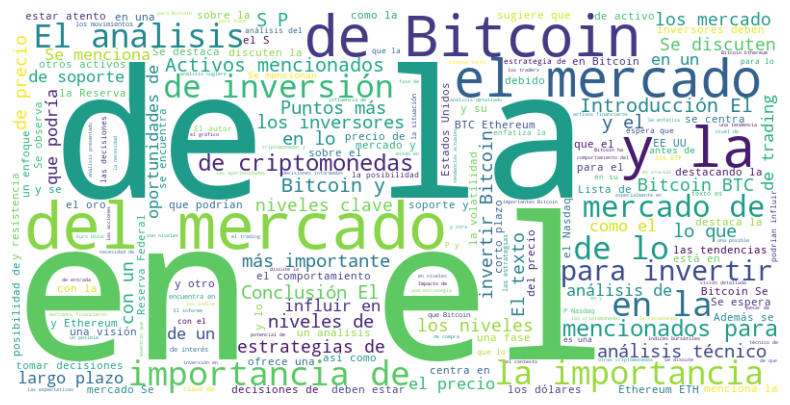

In [44]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Combinar todos los textos en un solo string
text = " ".join(review for review in df['summary'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [45]:
wordcloud = WordCloud(
    width=800, 
    height=400, 
    max_words=200, 
    background_color='white', 
    colormap='viridis',  # Cambiar el esquema de colores
    stopwords=None,      # Puedes añadir tus propias stopwords
    contour_color='steelblue', 
    contour_width=3
).generate(text)

In [46]:
def unir_tokens_from_lista(lista_tokens:list)->list:
    all_tokens = []
    for t in lista_tokens:
        all_tokens.extend(t)
    print("all_tokens_title =",len(all_tokens))
    return all_tokens 

In [48]:

def analisis_grafico_3(all_tokens: list, palabras_top: int = 10):
    # Análisis de frecuencia en palabras
    fdist = nltk.FreqDist(all_tokens)
    print('Size BoW =', len(fdist))
    
    # Palabras más comunes
    topwords = fdist.most_common(palabras_top)
    x, y = zip(*topwords)
    
    # Crear gráfico de barras horizontales
    plt.figure(figsize=(15, 10))
    
    # Usar un degradado de azul en la paleta de colores
    palette = sns.light_palette("blue", reverse=True, n_colors=palabras_top)  # Paleta en degradado azul
    
    # Graficar barras horizontales con el degradado
    plt.barh(x, y, color=palette)
    
    # Invertir el eje Y para que el ranking se vea de mayor a menor
    plt.gca().invert_yaxis()
    
    # Ajustar el tamaño de las etiquetas
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    # Etiquetas de los ejes
    plt.xlabel('Frecuencia', fontsize=16)
    plt.ylabel('Palabras', fontsize=16)
    
    # Mostrar gráfico
    plt.show()

In [49]:
df["chanel_name"].unique()

['USACRYPTONOTICIAS', 'Memorias de Tiburón', 'Crecetrader | Academia on-line', 'ARENA ALFA ', 'Bitcoin hoy']
Categories (5, object): ['ARENA ALFA ', 'Bitcoin hoy', 'Crecetrader | Academia on-line', 'Memorias de Tiburón', 'USACRYPTONOTICIAS']

all_tokens_title = 1334067
Size BoW = 25189


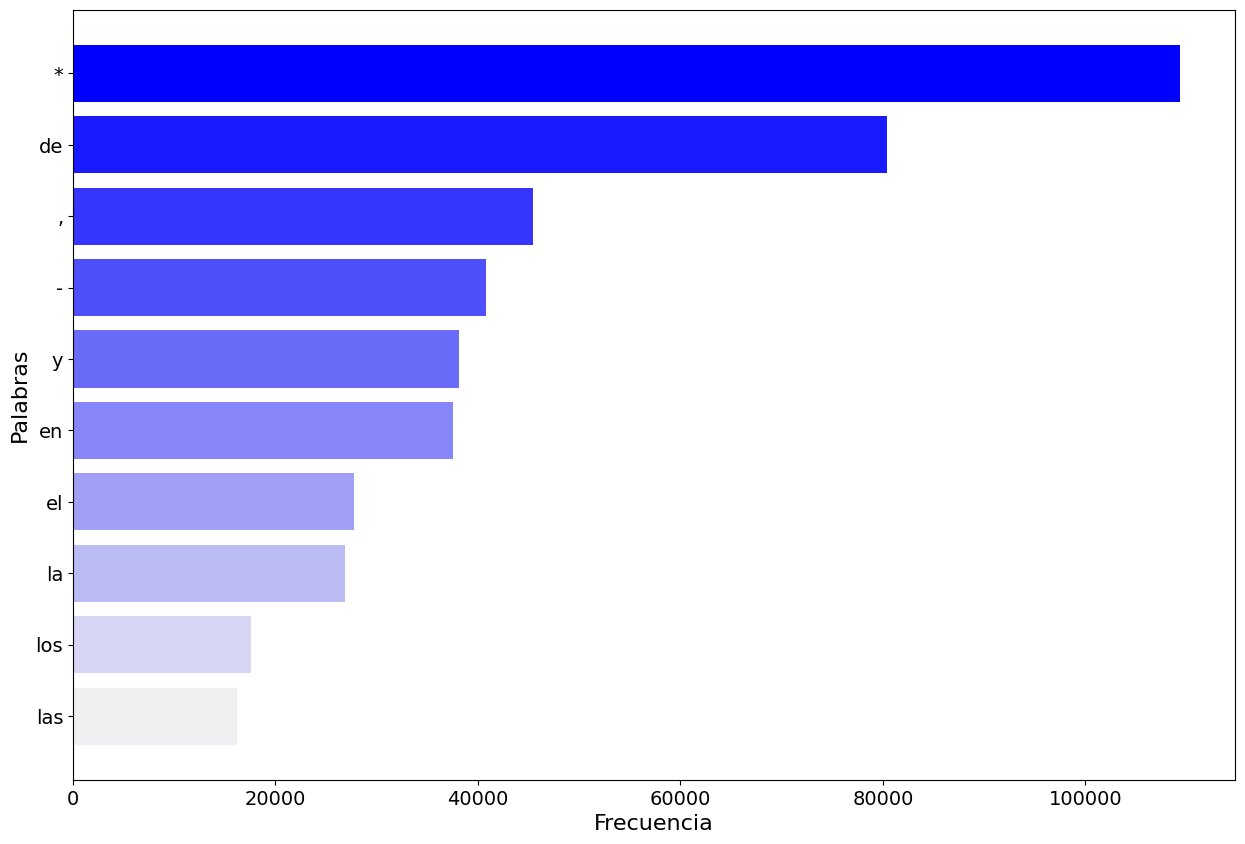

In [61]:
#lista_tokens = df[df["chanel_name"]==ARENA ALFA]["tokenized_text"].values
lista_tokens = df["tokenized_text"].values
all_tokens = unir_tokens_from_lista(lista_tokens)
analisis_grafico_3(all_tokens)


### preprocesamiento inicial y elimininacion de stop words

In [62]:
from nltk.corpus import stopwords
def quitar_tildes(s):  
    s = re.sub(r'[áàä]', 'a', s)  
    s = re.sub(r'[éèë]', 'e', s)  
    s = re.sub(r'[íìï]', 'i', s)  
    s = re.sub(r'[óòö]', 'o', s)  
    s = re.sub(r'[úùü]', 'u', s)  
    return s  

def preprocesamiento_and_stopwords(all_tokens):
    stop_words_nltk = set(stopwords.words('spanish'))
    prepro_tokens = [quitar_tildes(w) for w in all_tokens]
    prepro_tokens = [w.lower() for w in prepro_tokens]  
    prepro_tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in prepro_tokens]
    prepro_tokens = [w for w in prepro_tokens if w not in stop_words_nltk]
    prepro_tokens = [w for w in prepro_tokens if w.isalpha()]
    prepro_tokens = [w for w in prepro_tokens if len(w)>3]
    return prepro_tokens

Size BoW = 12696


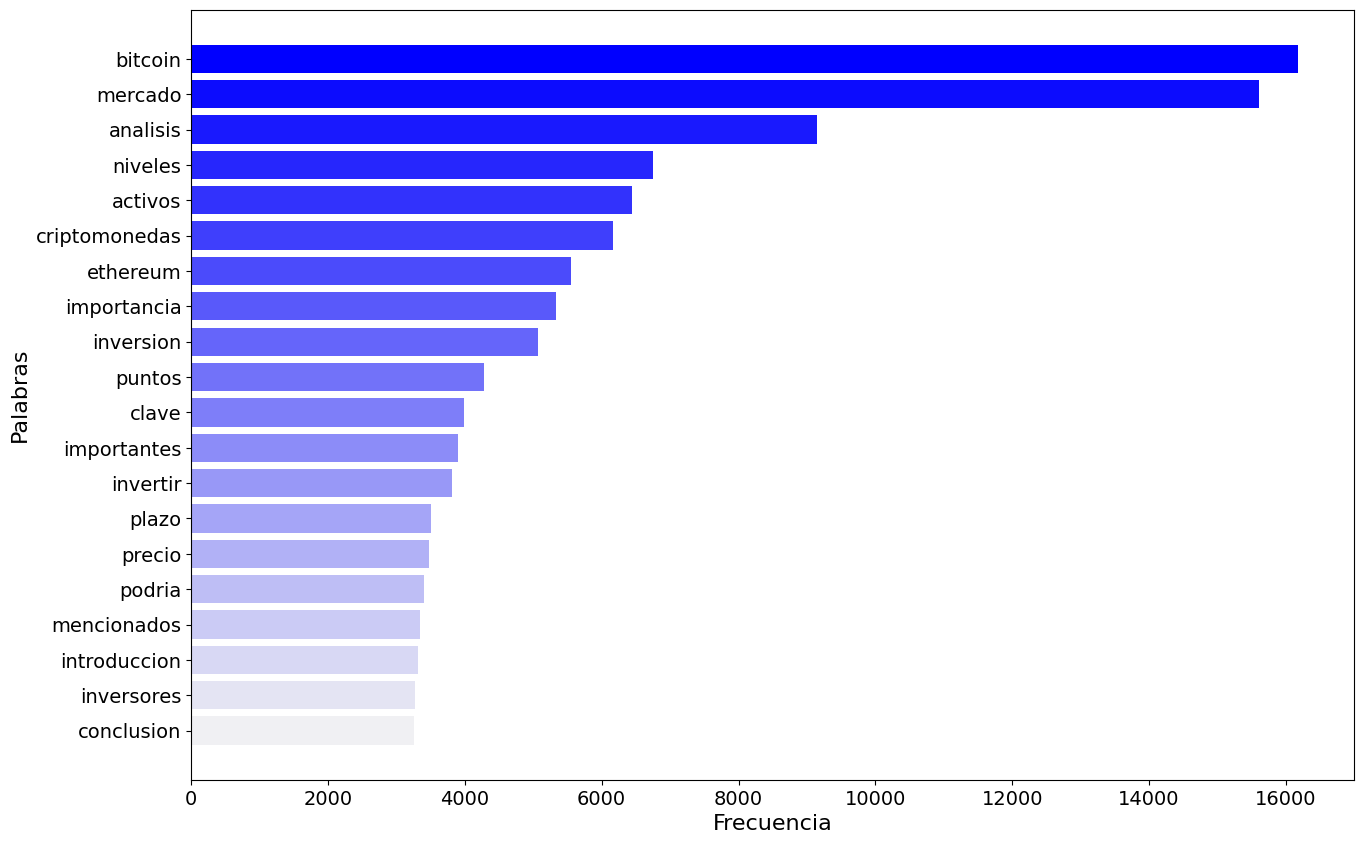

In [63]:
prepro_tokens = preprocesamiento_and_stopwords(all_tokens)
analisis_grafico_3(prepro_tokens, 20)

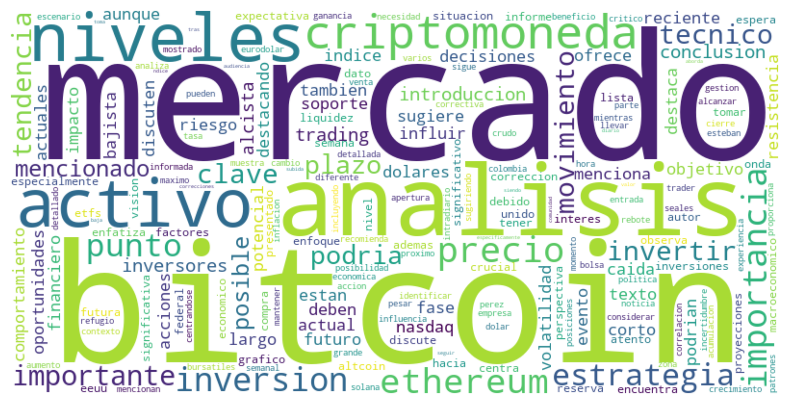

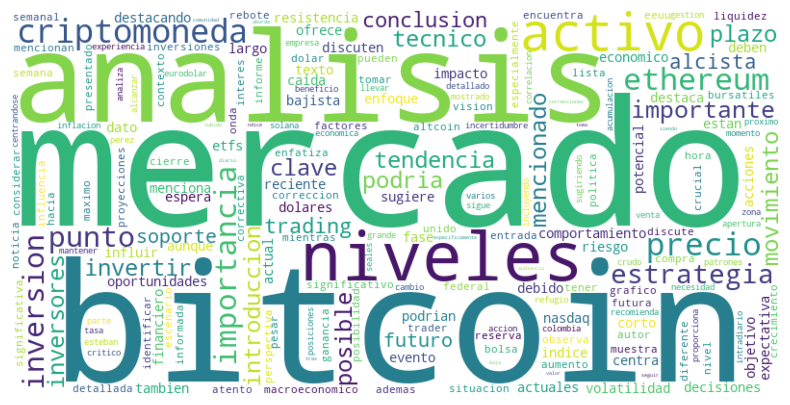

In [55]:
# Combinar todos los textos en un solo string
text = " ".join(prepro_tokens)



for interpolation in [False, True]:
    # Mostrar la nube de palabras
    # Crear la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='hamming') #'nearest', 'bilinear', 'bicubic', 'hanning', 'hamming', 'hermite', 'gaussian'
    plt.axis("off")
    plt.show()

In [56]:
key_terms = df['key_terms'].values
list_all_terms = [re.sub(r" \([^()]*\)", "", term.strip()) for sublist in key_terms for term in sublist]

In [57]:
def preprocesamiento_and_stopwords(all_tokens):
    stop_words_nltk = set(stopwords.words('spanish'))
    prepro_tokens = [quitar_tildes(w) for w in all_tokens]
    prepro_tokens = [w.lower() for w in prepro_tokens]
    
    # Mantener "S&P 500" como una sola entidad
    prepro_tokens = ['sp500' if 's&p' in w.lower() else w for w in prepro_tokens]
    
    # Eliminar caracteres especiales excepto en "s&p500"
    prepro_tokens = [re.sub(r'[^A-Za-z0-9]+','',w) if w != 's&p500' else w for w in prepro_tokens]
    
    prepro_tokens = [w for w in prepro_tokens if w not in stop_words_nltk]
    prepro_tokens = [w for w in prepro_tokens if len(w)>1]
    
    return prepro_tokens

Size BoW = 2332


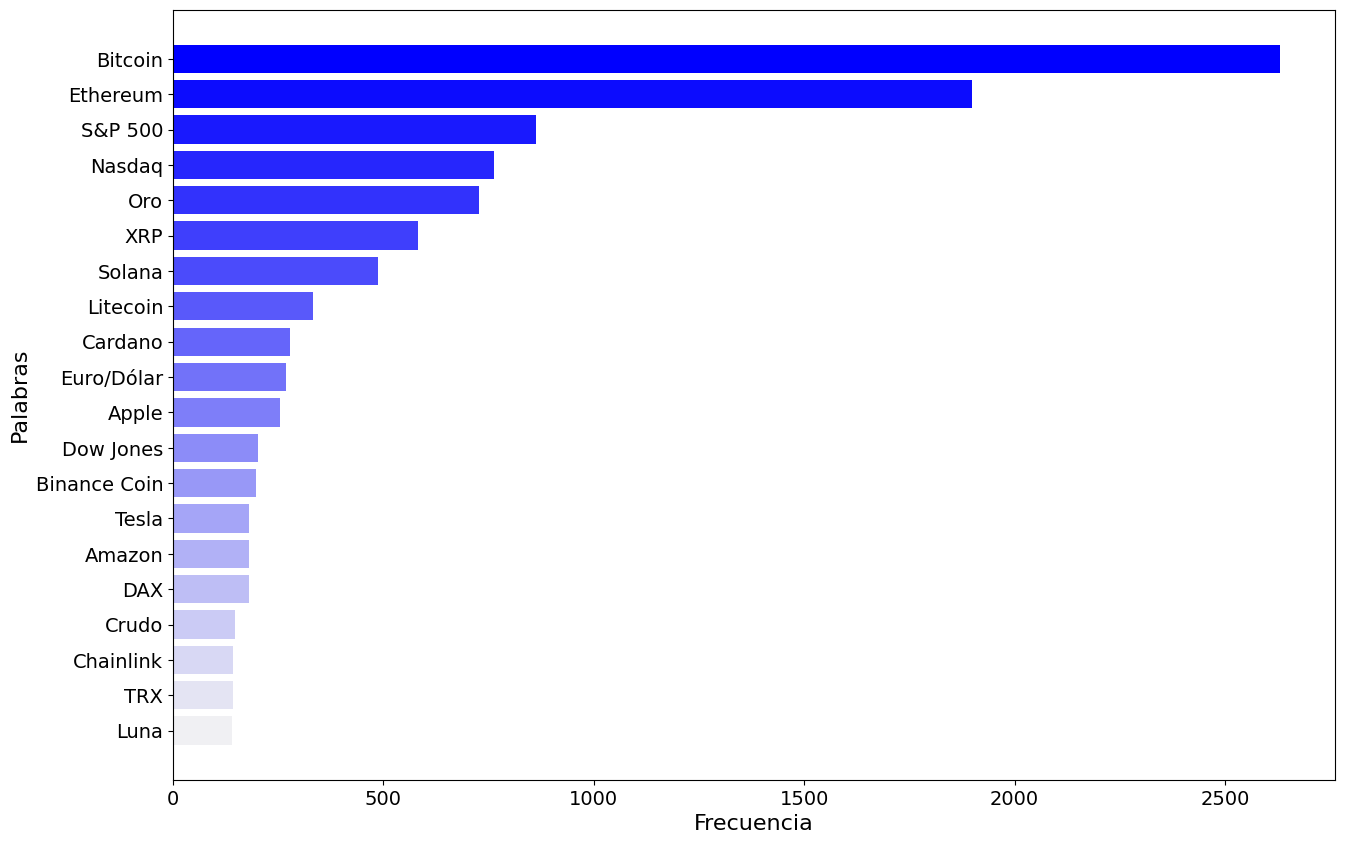

Size BoW = 2100


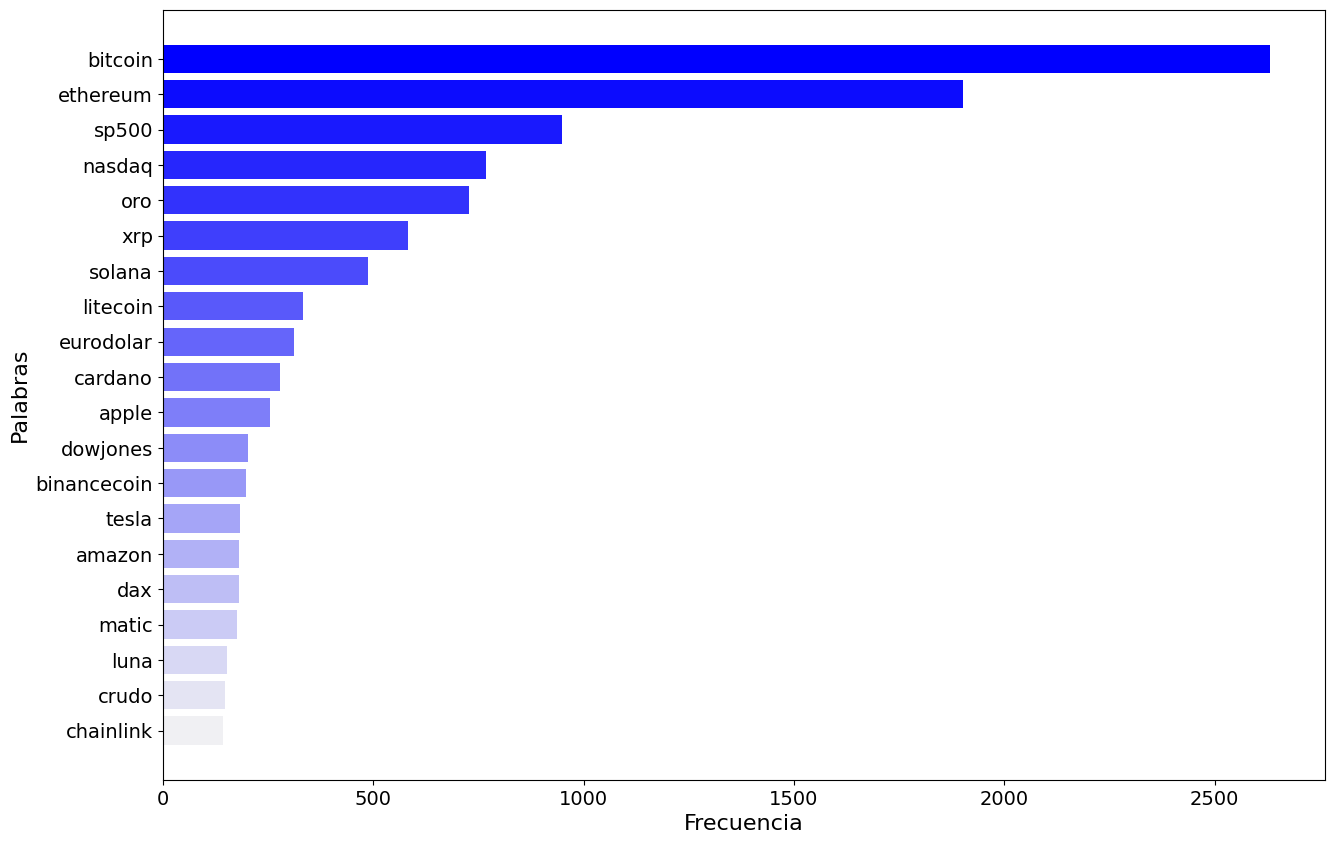

In [58]:
analisis_grafico_3(list_all_terms,20)

prepro_tokens = preprocesamiento_and_stopwords(list_all_terms)
analisis_grafico_3(prepro_tokens,20)

### lematizacion y stemmer

In [149]:
#Lemmatization y stemmer

from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer

def preprocesamiento_lematizacion_stemming(tokens):
    lancaster = LancasterStemmer()
    wordnet_lemmatizer = WordNetLemmatizer()

    prepro_tokens = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens ]
    prepro_tokens = [wordnet_lemmatizer.lemmatize(w, pos="n") for w in prepro_tokens ]
    prepro_tokens = [wordnet_lemmatizer.lemmatize(w, pos="a") for w in prepro_tokens ]
    prepro_tokens = [wordnet_lemmatizer.lemmatize(w, pos="r") for w in prepro_tokens ]

    prepro_tokens = [lancaster.stem(w) for w in prepro_tokens]
    prepro_tokens = [w for w in prepro_tokens if len(w)>2]

    return prepro_tokens


Size BoW = 9612


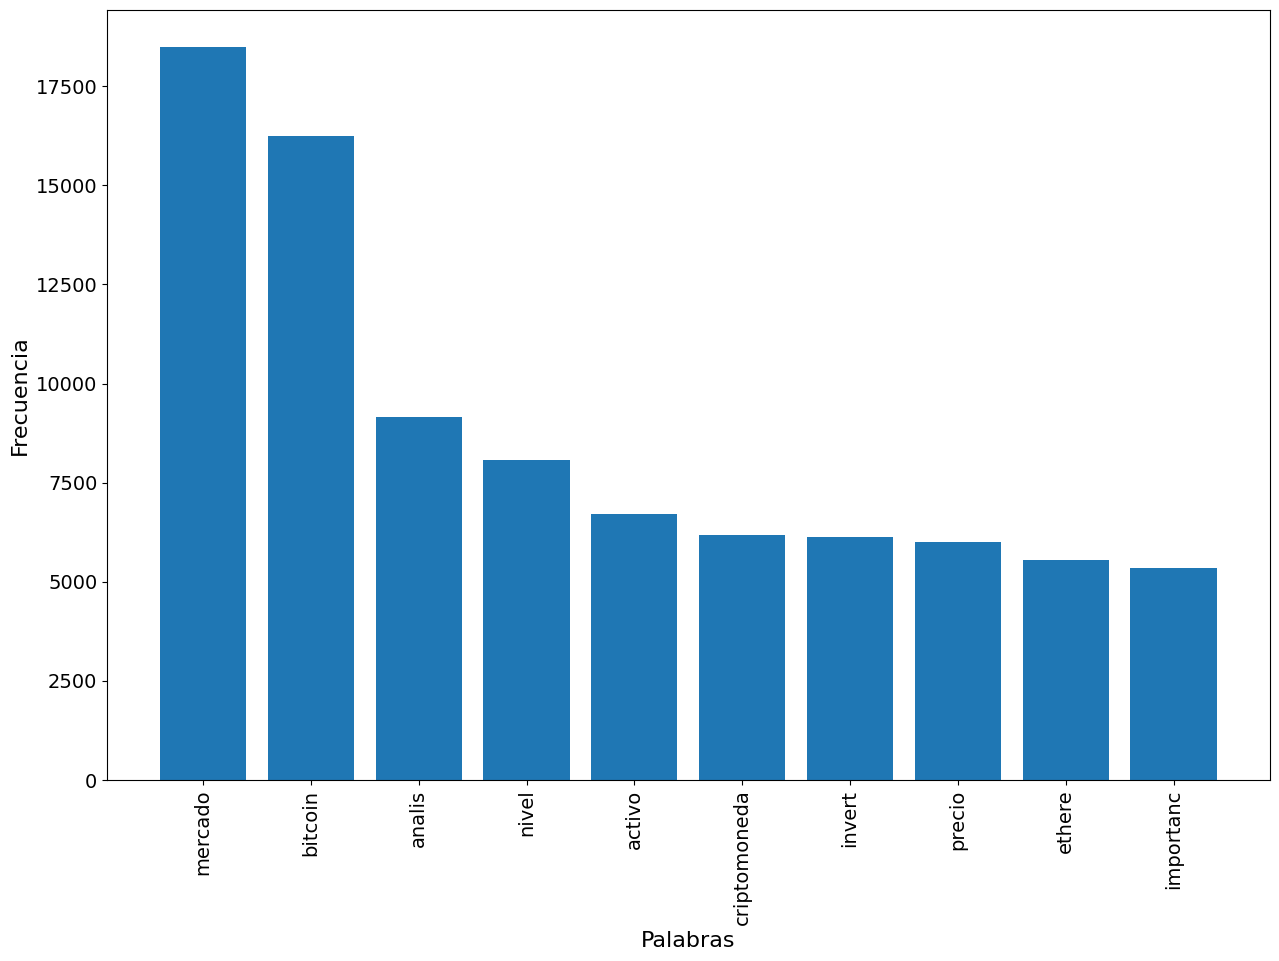

In [116]:
prepro_tokens = preprocesamiento_lematizacion_stemming(prepro_tokens)
analisis_grafico(prepro_tokens)

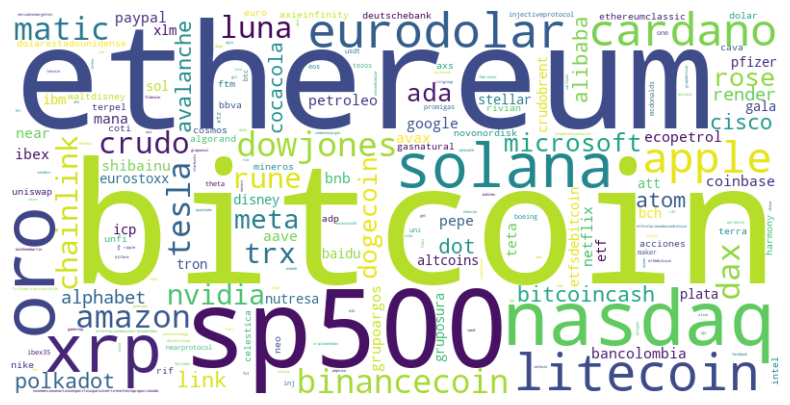

In [150]:
# Combinar todos los textos en un solo string
text = " ".join(prepro_tokens)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

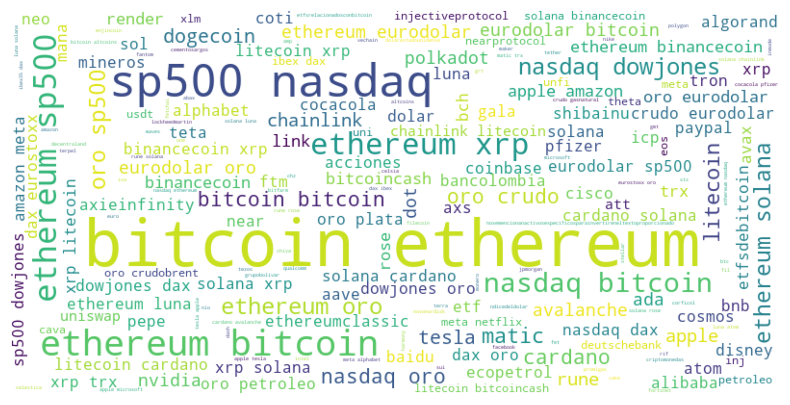

In [151]:
# Combinar todos los textos en un solo string
text = " ".join(prepro_tokens)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=True).generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='hamming')
plt.axis("off")
plt.show()

## Matriz de frecuencia de terminos

In [64]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def crear_matriz_frecuencia_terminos(prepro_tokens: list):
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=None)
    
    # Matriz dispersa de frecuencia de términos
    X = vectorizer.fit_transform(prepro_tokens)
    
    # Obtener el vocabulario
    T = vectorizer.get_feature_names_out()

    return X, T

def extraer_topicos_con_LDA(X, T, numero_topicos=5, numero_terminos=10):
    lda = LatentDirichletAllocation(n_components=numero_topicos, random_state=42)
    lda.fit(X)

    # Mostrar los términos más importantes por cada tópico
    for idx, topic in enumerate(lda.components_):
        print(f"Tópico {idx + 1}:")
        top_terminos = [T[i] for i in topic.argsort()[:-numero_terminos - 1:-1]]
        print(" ".join(top_terminos))


X, T = crear_matriz_frecuencia_terminos(prepro_tokens)
extraer_topicos_con_LDA(X, T, numero_topicos=5, numero_terminos=5)

Tópico 1:
activos criptomonedas clave invertir precio
Tópico 2:
niveles conclusion estrategias tecnico soporte
Tópico 3:
analisis ethereum puntos plazo podria
Tópico 4:
bitcoin mercado importancia importantes mencionados
Tópico 5:
inversion introduccion inversores mercados oportunidades


In [65]:
extraer_topicos_con_LDA(X, T, numero_topicos=5, numero_terminos=10)

Tópico 1:
activos criptomonedas clave invertir precio precios texto acciones tendencias largo
Tópico 2:
niveles conclusion estrategias tecnico soporte discuten nasdaq futuros menciona eventos
Tópico 3:
analisis ethereum puntos plazo podria trading decisiones sugiere resistencia actual
Tópico 4:
bitcoin mercado importancia importantes mencionados movimientos destaca deben posible fase
Tópico 5:
inversion introduccion inversores mercados oportunidades dolares comportamiento alcista volatilidad posibles
